# \Matplotlib grid task

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec


In [61]:
x  = sns.load_dataset("iris")
x

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### without figsize()

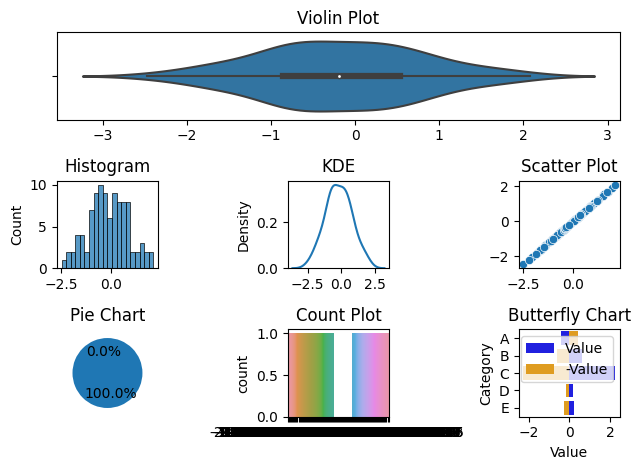

In [62]:

# Assuming you have some data 'x' and 'butterfly_data'
x = np.random.randn(100)
butterfly_data = pd.DataFrame({'Value': np.random.randn(5), 'Category': list('ABCDE')})

# Create a 3x3 grid of subplots
G = gridspec.GridSpec(3, 3)

# Violin Plot
ax1 = plt.subplot(G[0, :])
sns.violinplot(x=x, ax=ax1)
ax1.set_title('Violin Plot')

# Histogram
ax3 = plt.subplot(G[1, 0])
sns.histplot(x=x, ax=ax3, bins=20, kde=False)
ax3.set_title('Histogram')

# KDE Plot
ax4 = plt.subplot(G[1, 1])
sns.kdeplot(x=x, ax=ax4)
ax4.set_title('KDE')

# Scatter Plot
ax5 = plt.subplot(G[1, 2])
sns.scatterplot(x=x, y=x, ax=ax5)
ax5.set_title('Scatter Plot')

# Pie Chart
ax6 = plt.subplot(G[2, 0])
total_length = len(x)
ax6.pie([len(x), total_length - len(x)], labels=['', ''], autopct='%1.1f%%', startangle=100)
ax6.set_title('Pie Chart')

# Count Plot
ax7 = plt.subplot(G[2, 1])
sns.countplot(x=x, ax=ax7)
ax7.set_title('Count Plot')

# Butterfly Plot
ax8 = plt.subplot(G[2, 2])
sns.barplot(x='Value', y='Category', data=butterfly_data, ax=ax8, color='blue', label='Value')
sns.barplot(x=-butterfly_data['Value'], y='Category', data=butterfly_data, ax=ax8, color='orange', label='-Value')
ax8.set_title('Butterfly Chart')
ax8.legend()

plt.tight_layout()
plt.show()


### with figsize()

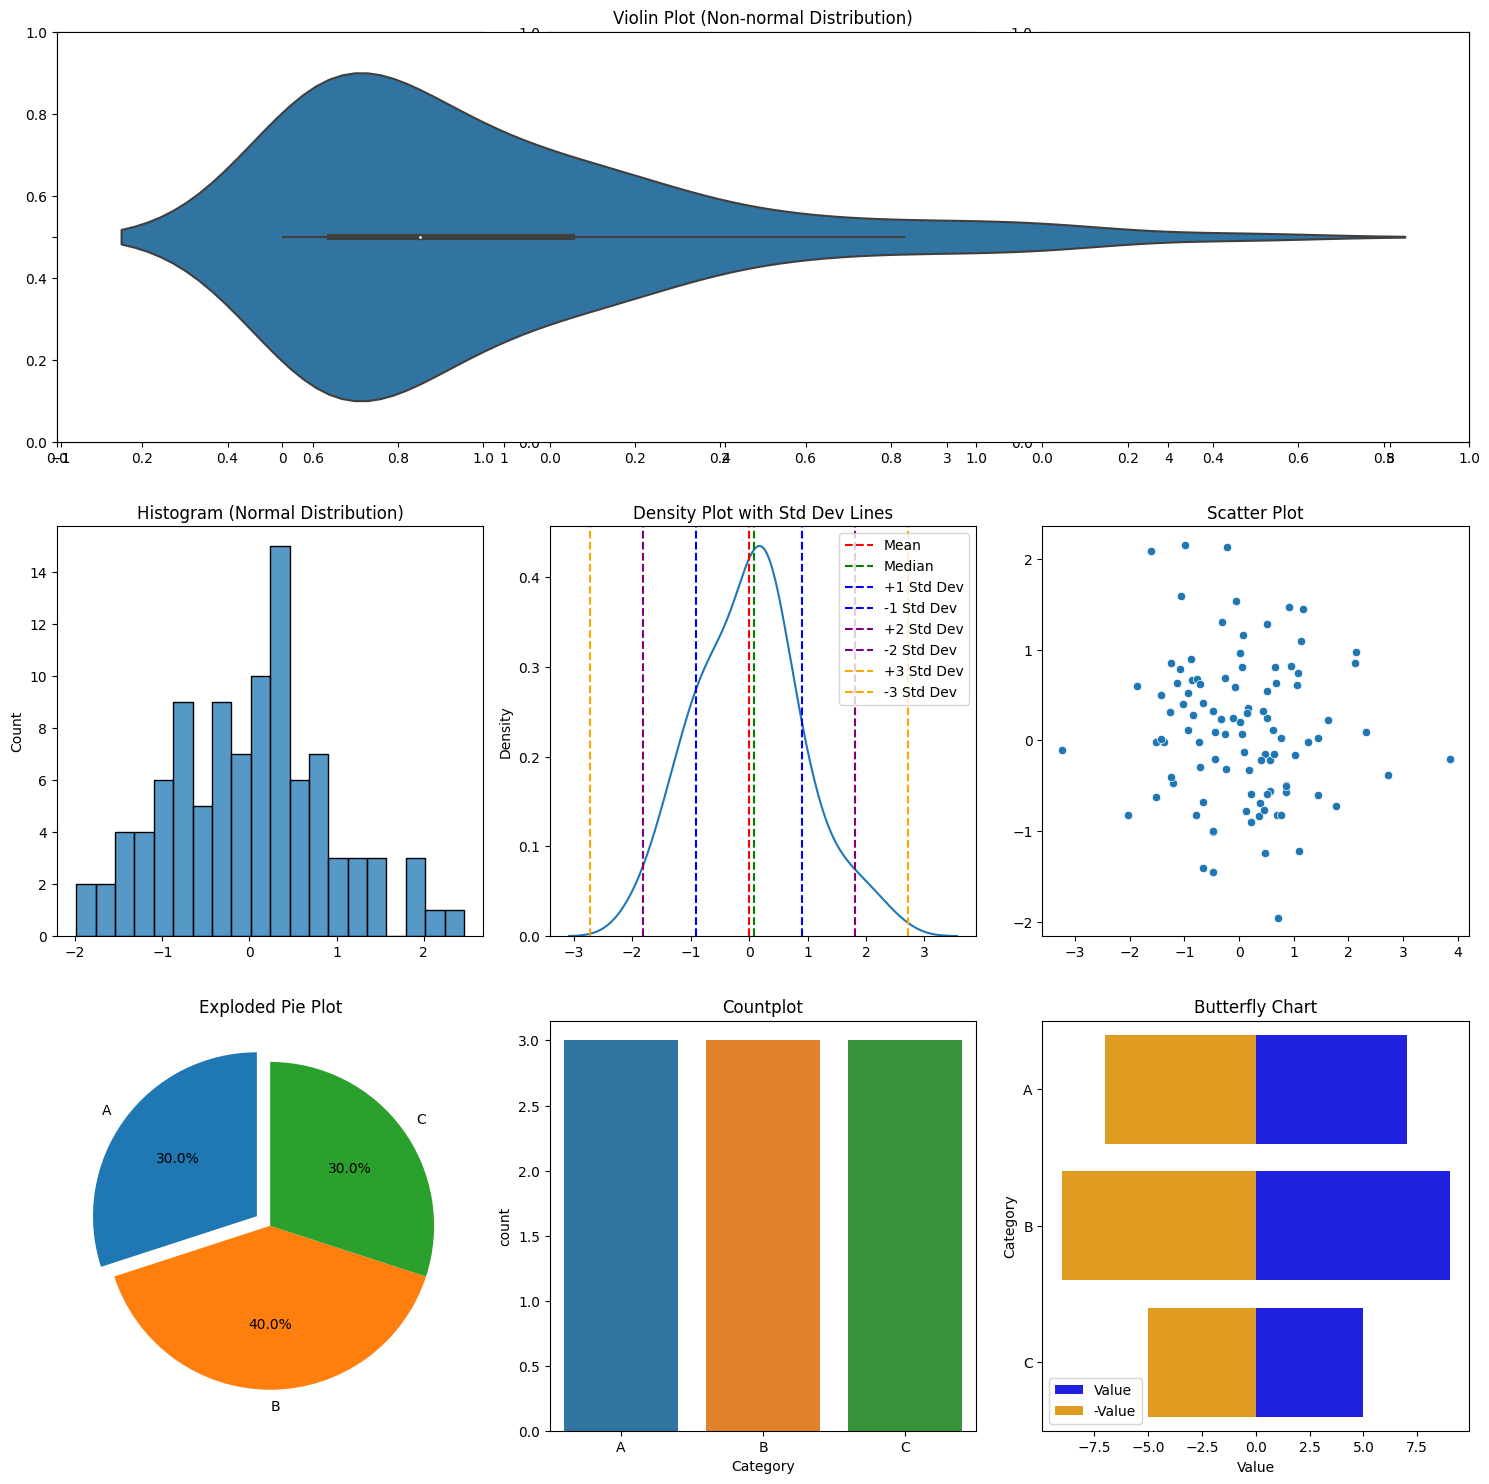

In [63]:
np.random.seed(42)
data_non_normal = np.random.exponential(size=(100,))
data_normal = np.random.normal(size=(100,))
data_countplot = pd.DataFrame({'Category': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C']})
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

G = gridspec.GridSpec(3, 3)
axes_violin = plt.subplot(G[0, :])

sns.violinplot(x=data_non_normal, ax=axes_violin, orient='h')
axes_violin.set_title('Violin Plot (Non-normal Distribution)')

sns.histplot(data_normal, ax=axes[1, 0], kde=False, bins=20)
axes[1, 0].set_title('Histogram (Normal Distribution)')
sns.kdeplot(data_normal, ax=axes[1, 1])
axes[1, 1].axvline(np.mean(data_normal), color='r', linestyle='--', label='Mean')
axes[1, 1].axvline(np.median(data_normal), color='g', linestyle='--', label='Median')
axes[1, 1].axvline(np.mean(data_normal) + np.std(data_normal), color='b', linestyle='--', label='+1 Std Dev')
axes[1, 1].axvline(np.mean(data_normal) - np.std(data_normal), color='b', linestyle='--', label='-1 Std Dev')
axes[1, 1].axvline(np.mean(data_normal) + 2 * np.std(data_normal), color='purple', linestyle='--', label='+2 Std Dev')
axes[1, 1].axvline(np.mean(data_normal) - 2 * np.std(data_normal), color='purple', linestyle='--', label='-2 Std Dev')
axes[1, 1].axvline(np.mean(data_normal) + 3 * np.std(data_normal), color='orange', linestyle='--', label='+3 Std Dev')
axes[1, 1].axvline(np.mean(data_normal) - 3 * np.std(data_normal), color='orange', linestyle='--', label='-3 Std Dev')
axes[1, 1].set_title('Density Plot with Std Dev Lines')
axes[1, 1].legend()

sns.scatterplot(x=np.random.randn(100), y=np.random.randn(100), ax=axes[1, 2])
axes[1, 2].set_title('Scatter Plot')

explode = (0.1, 0, 0)
axes[2, 0].pie([30, 40, 30], explode=explode, labels=['A', 'B', 'C'], autopct='%1.1f%%', startangle=90)
axes[2, 0].set_title('Exploded Pie Plot')

sns.countplot(x='Category', data=data_countplot, ax=axes[2, 1])
axes[2, 1].set_title('Countplot')

butterfly_data = pd.DataFrame({
    'Category': ['A', 'B', 'C'],
    'Value': [7,9,5]})


sns.barplot(x='Value', y='Category', data=butterfly_data, ax=axes[2, 2], color='blue', label='Value')
sns.barplot(x=-butterfly_data['Value'], y='Category', data=butterfly_data, ax=axes[2, 2], color='orange', label='-Value')
axes[2, 2].set_title('Butterfly Chart')
axes[2, 2].legend()

plt.tight_layout()
plt.show()
